<a href="https://colab.research.google.com/github/lukaszlewickii/racket-hub-assistant/blob/master/assistant_sft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import json
import random
from datetime import datetime

SCENARIOS_PL = [
    {
        "context": "Pytanie o zasady padla",
        "questions": [
            "Jakie są podstawowe zasady padla?",
            "Jak się gra w padla?",
            "Czym różni się padel od tenisa?",
            "Czy w padlu można używać ścian?",
            "Jak wygląda kort do padla?",
        ],
        "answers": [
            "Padel to gra 2 vs 2 na korcie otoczonym szklanymi ścianami.  Serwis wykonuje się spodem, piłka musi odbić się w polu serwisowym.  Możesz używać ścian - piłka może się od nich odbijać!  Punktacja jak w tenisie:  15, 30, 40, gra.",
            "W padla gra się czwórkami (2 vs 2) na mniejszym korcie niż tenis. Kort ma szklane ściany, których można używać podczas gry. Serwis wykonuje się spodem, a punktacja jest identyczna jak w tenisie.",
            "Główne różnice: 1) Padel ma szklane ściany, których używasz w grze. 2) Kort jest mniejszy.  3) Zawsze gra się w deblu (2v2). 4) Rakieta jest solidna bez strun. 5) Piłka ma niższe ciśnienie.",
            "Tak!  To jest główna cecha padla - możesz odbijać piłkę od szklanych ścian.  Najpierw piłka musi odbić się od podłoża, ale potem może trafić w ścianę. Możesz też celowo zagrać w ścianę po swojej stronie.",
            "Kort do padla ma wymiary 10x20m, otoczony jest szklanymi ścianami (3m wysokości) i metalową siatką. Jest mniejszy niż kort tenisowy. Ma charakterystyczną siatkę pośrodku i oznaczone pola serwisowe.",
        ]
    },
    {
        "context": "Matchmaking i szukanie partnerów",
        "questions":  [
            "Szukam kogoś do gry w padla w Warszawie",
            "Jak znaleźć partnera do squasha?",
            "Chcę zagrać dziś wieczorem, kto chętny? ",
            "Jestem początkujący, szukam kogoś na podobnym poziomie",
            "Gdzie mogę znaleźć ludzi do gry?",
        ],
        "answers": [
            "Super! Pomogę Ci znaleźć partnera.  Kilka pytań:  1) Jaki masz poziom (początkujący/średni/zaawansowany)? 2) O której chcesz grać? 3) W jakiej dzielnicy? 4) Masz już kort czy trzeba zarezerwować?",
            "Znajdę dla Ciebie partnerów do squasha!  Powiedz mi:  jaki jest Twój poziom zaawansowania, kiedy chcesz grać i w jakiej lokalizacji?  To pomoże mi dopasować odpowiednich graczy.",
            "Świetnie! Aby znaleźć partnera na dziś:  1) Podaj swoją lokalizację 2) Preferowaną godzinę 3) Poziom zaawansowania.  Sprawdzę kto jest dostępny w Twojej okolicy! ",
            "Doskonale, że chcesz grać z kimś na podobnym poziomie!  Dla początkujących polecam: 1) Szukanie w lokalnych klubach 2) Grupy dla beginnerów 3) Lekcje z instruktorem na start.  Chcesz, żebym znalazł początkujących w Twojej okolicy? ",
            "Możesz znaleźć partnerów:  1) W tej aplikacji (dodaj swój profil i preferencje) 2) Lokalne kluby padla/squasha często mają tablice ogłoszeń 3) Grupy Facebook w Twoim mieście 4) Zapytaj recepcję w klubie.  Gdzie mieszkasz?",
        ]
    },
    {
        "context": "Sprzęt i wyposażenie",
        "questions": [
            "Jaką rakietę do padla polecasz dla początkujących?",
            "Co zabrać na pierwszy trening?",
            "Czy potrzebuję specjalnych butów?",
            "Jaka piłka jest używana w squashu?",
            "Ile kosztuje dobra rakieta do padla?",
        ],
        "answers": [
            "Dla początkujących polecam rakietę o okrągłym kształcie (round shape) - jest najbardziej kontrolna. Dobry wybór to:  Bullpadel Vertex, Head Alpha, Adidas Adipower (wersje początkujące). Budżet: 300-600 zł na start.",
            "Na pierwszy trening zabierz: 1) Buty sportowe (najlepiej do tenisa/indoor) 2) Sportowy strój (koszulka, spodenki/legginsy) 3) Ręcznik i wodę 4) Rakietę (jeśli masz, często można wypożyczyć). To wystarczy! ",
            "Tak, buty są ważne! Potrzebujesz butów do sportów indoor z dobrą przyczepnością i stabilnością boczną. Unikaj butów do biegania - za mało stabilności.  Dobre opcje: buty do tenisa, squasha lub specjalne do padla.",
            "W squashu używa się małej, gumowej piłki z kropkami. Kropki oznaczają prędkość:  1 kropka (żółta) = najszybsza, 2 kropki (zielona/biała) = średnia.  Dla początkujących: niebieska lub czerwona (wolniejsze, łatwiejsze do gry).",
            "Rakiety do padla:  Początkujący: 300-600 zł, Średniozaawansowani: 600-1200 zł, Profesjonalne: 1200-2000+ zł. Na start nie przepłacaj - 400-500 zł wystarczy na dobrą rakietę kontrolną.",
        ]
    },
    {
        "context": "Technika i poprawa gry",
        "questions": [
            "Jak poprawić swój backhand w squashu?",
            "Jakie są podstawowe uderzenia w padlu?",
            "Jak wykonać dobry serwis?",
            "Czym jest vibora w padlu?",
            "Jak trenować samemu?",
        ],
        "answers": [
            "Backhand w squashu:  1) Prawidłowy grip - continental 2) Rotacja bioder i ramion 3) Kontakt z piłką przed ciałem 4) Follow-through w kierunku celu.  Ćwicz przy ścianie solo, powtarzając ruch.  Filmuj się i analizuj.",
            "Podstawowe uderzenia w padlu: 1) Bandeja (defensywna smecz) 2) Vibora (ofensywna z rotacją) 3) Remate (smecz winner) 4) Chiquita (lob z returnu) 5) Bajada (volley przy siatce). Na start opanuj bandeję i podstawowe volleje.",
            "Dobry serwis w padlu: 1) Pozycja:  za linią serwisową 2) Piłka odbija się raz od podłoża 3) Uderzenie spodem/bokiem na wysokości pasa 4) Celuj w róg pola serwisowego 5) Obserwuj odbicie od ściany. Trening:  powtarzaj 50x dziennie.",
            "Vibora to ofensywne uderzenie w padlu - połączenie między bandeją a rematem. Wykonujesz je z rotacją nadgarstka (slice), piłka ma backspin i po odbiciu zostaje nisko. Używane do ataku bez ryzyka auta.  Trudniejsze od bandei.",
            "Trening solo:  1) Padel/squash:  gra ze ścianą (volleje, returny) 2) Footwork: drabinka zwinności 3) Fizyka: sprint intervals, strength 4) Technika: nagrywaj się, analizuj 5) 15 min dziennie = widoczny progres w miesiąc! ",
        ]
    },
    {
        "context": "Różnice między sportami",
        "questions": [
            "Czym różni się padel od squasha? ",
            "Co jest trudniejsze - padel czy squash?",
            "Czy umiejętności z tenisa przydają się w padlu?",
            "Który sport jest lepszy dla początkujących?",
        ],
        "answers": [
            "Padel vs Squash:  PADEL - kort ze szkłem na zewnątrz, gra 2v2, rakieta solidna, wolniejsze tempo. SQUASH - zamknięty kort 4 ściany, głównie 1v1, rakieta ze strunami, bardzo szybkie tempo, bardziej fizyczne.",
            "To zależy!  Squash jest bardziej fizycznie wymagający (cardio, wytrzymałość), szybsze tempo.  Padel wymaga lepszej koordynacji zespołu (deblowa strategia) i czytania odbiać od szkła. Oba mają wysoki skill ceiling.  Padel łatwiejszy na start.",
            "Tak!  Z tenisa przeniesiesz:  technikai uderzeń (forehand/backhand), czucie piłki, footwork, taktykę debla. Musisz się przyzwyczaić do:  ścian w grze, niższego odbicia piłki, mniejszego kortu, innej rakiety.  Tenisiści szybko łapią padla! ",
            "PADEL łatwiejszy na start:  wolniejsza piłka, większa rakieta, gra zespołowa (partner pomaga), ściany dają więcej czasu.  SQUASH trudniejszy:  bardzo szybka piłka, mała rakieta, intensywne fizycznie.  Padel = bardziej social, Squash = bardziej workout.",
        ]
    },
]

SCENARIOS_EN = [
    {
        "context": "Rules and basics",
        "questions": [
            "What are the basic rules of padel?",
            "How do you play padel?",
            "What's the difference between padel and tennis?",
            "Can you use walls in padel?",
            "What does a padel court look like?",
        ],
        "answers": [
            "Padel is played 2v2 on a court surrounded by glass walls.  Serve underhand, ball must bounce in service box. You can use walls - ball can bounce off them!  Scoring like tennis: 15, 30, 40, game.",
            "Padel is played in doubles (2v2) on a smaller court than tennis. Court has glass walls you use during play. Serve underhand, scoring identical to tennis.",
            "Main differences: 1) Padel has glass walls you use in play 2) Smaller court 3) Always doubles (2v2) 4) Solid racket, no strings 5) Lower pressure ball.",
            "Yes! That's the main feature - you can bounce ball off glass walls. Ball must bounce on floor first, then can hit wall. You can also intentionally play into wall on your side.",
            "Padel court is 10x20m, surrounded by glass walls (3m high) and metal mesh.  Smaller than tennis court. Has net in middle and marked service boxes.",
        ]
    },
    {
        "context": "Finding partners",
        "questions": [
            "Looking for someone to play padel with",
            "How do I find a squash partner?",
            "Want to play tonight, anyone interested?",
            "I'm a beginner, looking for similar level",
        ],
        "answers": [
            "Great! I'll help you find a partner. Few questions: 1) What's your level (beginner/intermediate/advanced)? 2) What time?  3) Which area? 4) Have a court or need to book?",
            "I'll find squash partners for you! Tell me:  your skill level, when you want to play, and location?  This helps match appropriate players.",
            "Excellent!  To find partner for today: 1) Share your location 2) Preferred time 3) Skill level. I'll check who's available in your area!",
            "Perfect that you want similar level! For beginners I recommend: 1) Local clubs 2) Beginner groups 3) Lessons with instructor to start. Want me to find beginners in your area?",
        ]
    },
]

def generate_training_data(num_examples=1000, language='pl'):

    scenarios = SCENARIOS_PL if language == 'pl' else SCENARIOS_EN
    system_prompt = (
        "Jesteś pomocnym asystentem w aplikacji do łączenia graczy padla i squasha. "
        "Pomagasz użytkownikom znaleźć partnerów do gry, odpowiadasz na pytania o zasady, "
        "sprzęt i technikę.  Jesteś przyjazny, konkretny i zwięzły."
    ) if language == 'pl' else (
        "You are a helpful assistant in an app for matching padel and squash players. "
        "You help users find game partners, answer questions about rules, equipment and technique. "
        "You are friendly, specific and concise."
    )

    data = []

    for i in range(num_examples):
        scenario = random.choice(scenarios)

        q_idx = random.randint(0, len(scenario['questions']) - 1)
        question = scenario['questions'][q_idx]
        answer = scenario['answers'][q_idx]

        example = {
            "messages": [
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": question},
                {"role": "assistant", "content": answer}
            ]
        }

        data.append(example)

    return data

def save_dataset(data, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + '\n')

def main():
    data_pl = generate_training_data(num_examples=500, language='pl')
    save_dataset(data_pl, 'padel_train_pl.jsonl')

    data_en = generate_training_data(num_examples=500, language='en')
    save_dataset(data_en, 'padel_train_en.jsonl')

    data_mixed = data_pl + data_en
    random.shuffle(data_mixed)
    save_dataset(data_mixed, 'padel_train_mixed.jsonl')

if __name__ == "__main__":
    main()

In [2]:
! pip install -q accelerate peft bitsandbytes transformers trl datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 23.5 MB/s eta 0:00:00


In [3]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline
)
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training, get_peft_model
from trl import SFTTrainer
from datasets import load_dataset
import os

In [4]:
MODEL_NAMES = {
    "phi2": "microsoft/phi-2",
    "phi3": "microsoft/Phi-3-mini-4k-instruct",
    "llama":  "meta-llama/Llama-3.2-1B-Instruct",
    "gemma": "google/gemma-2b-it",
    "qwen":  "Qwen/Qwen2-1.5B-Instruct"
}

MODEL_NAME = MODEL_NAMES["qwen"]
OUTPUT_DIR = "./padel-lora-model"
DATASET_FILE = "padel_train_mixed.jsonl"

LORA_R = 16
LORA_ALPHA = 32
LORA_DROPOUT = 0.05

BATCH_SIZE = 4
GRADIENT_ACCUMULATION = 4
LEARNING_RATE = 2e-4
EPOCHS = 3
MAX_SEQ_LENGTH = 512

In [ ]:
dataset = load_dataset('json', data_files=DATASET_FILE, split='train')

In [6]:
dataset

Dataset({
    features: ['messages'],
    num_rows: 1000
})

In [7]:
dataset.to_pandas().loc[0].reset_index(drop=True).loc[0]

array([{'role': 'system', 'content': 'Jesteś pomocnym asystentem w aplikacji do łączenia graczy padla i squasha. Pomagasz użytkownikom znaleźć partnerów do gry, odpowiadasz na pytania o zasady, sprzęt i technikę.  Jesteś przyjazny, konkretny i zwięzły.'},
       {'role': 'user', 'content': 'Co zabrać na pierwszy trening?'},
       {'role': 'assistant', 'content': 'Na pierwszy trening zabierz: 1) Buty sportowe (najlepiej do tenisa/indoor) 2) Sportowy strój (koszulka, spodenki/legginsy) 3) Ręcznik i wodę 4) Rakietę (jeśli masz, często można wypożyczyć). To wystarczy! '}],
      dtype=object)

In [8]:
dataset = dataset.train_test_split(test_size=0.1)

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 900
    })
    test: Dataset({
        features: ['messages'],
        num_rows: 100
    })
})

In [10]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float32,
    # quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

In [13]:
peft_config = LoraConfig(
    r=LORA_R,
    lora_alpha=LORA_ALPHA,
    lora_dropout=LORA_DROPOUT,
    target_modules=["q_proj", "v_proj", "k_proj", "o_proj"],
    bias="none",
    task_type="CAUSAL_LM",
)

In [14]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 4,358,144 || all params: 1,548,072,448 || trainable%: 0.2815


In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 900
    })
    test: Dataset({
        features: ['messages'],
        num_rows: 100
    })
})

In [16]:
# dataset = dataset.train_test_split(test_size=0.1)
train_dataset = dataset['train']
eval_dataset = dataset['test']

In [18]:
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,

    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION,

    learning_rate=LEARNING_RATE,
    num_train_epochs=10,
    max_steps=-1,

    fp16=False,
    bf16=False,

    logging_steps=10,
    logging_first_step=True,

    eval_strategy="steps",
    eval_steps=50,

    save_strategy="steps",
    save_steps=100,
    save_total_limit=2,

    optim="adamw_torch_fused",
    lr_scheduler_type="cosine",
    warmup_ratio=0.05,

    group_by_length=True,
    report_to="none",

    gradient_checkpointing=False,
)

In [ ]:
if tokenizer.chat_template is None:
    tokenizer.chat_template = (
        "{% for message in messages %}"
        "{% if message['role'] == 'system' %}"
        "{{ '<|im_start|>system\n' + message['content'] + '<|im_end|>\n' }}"
        "{% elif message['role'] == 'user' %}"
        "{{ '<|im_start|>user\n' + message['content'] + '<|im_end|>\n' }}"
        "{% elif message['role'] == 'assistant' %}"
        "{{ '<|im_start|>assistant\n' + message['content'] + '<|im_end|>\n' }}"
        "{% endif %}"
        "{% endfor %}"
        "{% if add_generation_prompt %}"
        "{{ '<|im_start|>assistant\n' }}"
        "{% endif %}"
    )

def format_prompts(examples):
    texts = []

    for messages in examples["messages"]:
        formatted_text = ""

        for msg in messages:
            role = msg["role"]
            content = msg["content"]

            if role == "system":
                formatted_text += f"<|system|>\n{content}\n"
            elif role == "user":
                formatted_text += f"<|user|>\n{content}\n"
            elif role == "assistant":
                formatted_text += f"<|assistant|>\n{content}\n"

        formatted_text += tokenizer.eos_token
        texts.append(formatted_text)

    return {"text": texts}

train_dataset = train_dataset.map(format_prompts, batched=True, remove_columns=train_dataset.column_names)
eval_dataset = eval_dataset. map(format_prompts, batched=True, remove_columns=eval_dataset.column_names)

In [23]:
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    # tokenizer=tokenizer,
    # dataset_text_field="text",
    # max_seq_length=MAX_SEQ_LENGTH,
    # packing=False,
)

Adding EOS to train dataset:   0%|          | 0/900 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/900 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/900 [00:00<?, ? examples/s]

Adding EOS to eval dataset:   0%|          | 0/100 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/100 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/100 [00:00<?, ? examples/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.


In [24]:
trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss,Validation Loss,Entropy,Num Tokens,Mean Token Accuracy
50,1.119300,0.919652,1.066206,119100.000000,0.798880
100,0.365700,0.401501,0.509595,230682.000000,0.909990
150,0.299000,0.192368,0.340430,345616.000000,0.956950
200,0.058600,0.096823,0.213862,457001.000000,0.978932
250,0.068100,0.048825,0.115815,573207.000000,0.986449
300,0.033100,0.047305,0.121780,684433.000000,0.986506
350,0.036500,0.031191,0.065846,801335.000000,0.987258
400,0.029100,0.029531,0.058682,911737.000000,0.988813
450,0.030200,0.028530,0.056063,1029527.000000,0.989184
500,0.027300,0.028407,0.055063,1142044.000000,0.988743


TrainOutput(global_step=570, training_loss=0.2922379034653045, metrics={'train_runtime': 2752.2255, 'train_samples_per_second': 3.27, 'train_steps_per_second': 0.207, 'total_flos': 1.0300180912779264e+16, 'train_loss': 0.2922379034653045, 'epoch': 10.0})

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    temperature=0.7,
    do_sample=True,
)

Device set to use cuda:0


In [ ]:
test_prompts = [
    # PL - Podstawowe
    "Jakie są podstawowe zasady padla?",
    "Czym różni się padel od squasha?",
    "Co powinienem zabrać na pierwszy trening padla?",

    # PL - Matchmaking
    "Szukam kogoś do gry w padla w Warszawie",
    "Jestem początkujący, jak znaleźć partnera na podobnym poziomie?",

    # PL - Sprzęt
    "Jaką rakietę polecasz dla początkujących?",
    "Ile kosztuje dobra rakieta do padla?",

    # EN - Basic
    "What are the basic rules of padel?",
    "What's the difference between padel and squash?",

    # EN - Technical
    "How do I improve my backhand in squash?",
    "What equipment do I need to start playing padel?",
]

In [ ]:
for prompt in test_prompts:
    formatted = f"<|im_start|>user\n{prompt}<|im_end|>\n<|im_start|>assistant\n"
    result = pipe(formatted, return_full_text=False)
    print(f"{result[0]['generated_text']}")
    print("-" * 80)


Padel to gra 2 vs 2 na kortach szklanych w powietrzu. Zasady: 2 siatków, piłka odbijająca się od belki, komunikacja po telefonze.
--------------------------------------------------------------------------------
Padel i Squash to dwa różne gry: Padel jest gra z podwójnymi kompaniami (2 vs 2) na nizinnej kortze (szczególnie w kropelinach), używane jest piłka z mniejszym powtórzeniem niż w squashu. Squash ma bardziej szkicowany i zwięzły style, korpus court jest bardziej wysoki, piłka ma większy powtór.
--------------------------------------------------------------------------------
Na pierwszym treningu padla powinienesz: 
- Pamiętać jak grać w padlu (szukanie odbicia od ściany, kontrola siły rąk i nog)
- Używać sztuk fizycznych (dodawanie się do gry, odniesienie się do podstawowej techniki)
- Przeróbka ciała.
--------------------------------------------------------------------------------
Wielka gra! Kto chcesz grać: (username) czy (username)? W Warszawie? 19:00?
-----------------------

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Dobra rakieta do padla może koszcieć od 1000 do 5000 zł za year. Jest to zalecane dla graczy zaledwie 2-3 roku. Pamiętaj, że cena zależy od kwalifikacji produkta (na przykład metalu, technologii napinania), marki i wielkości.
--------------------------------------------------------------------------------
Padel is played in pairs on a court surrounded by glass walls. Key rules: 1) You use a smaller, court-based version of tennis ball 2) You can hit ball back into play 3) You can't block underhand 4) You can't kick ball 5) You can't touch court 6) You can't use hands 7) You have fewer points 8) You have fewer players per side.
--------------------------------------------------------------------------------
Padel is a court-sport for 2v2 (player vs. player) that you can play indoors/outdoors. Padel has smaller balls, walls you can bounce ball off, and you use tennis racket.
 Squash is a court-sport for 1v1 (player vs. opponent) that you can only play indoors. Squash uses big rackets, no 

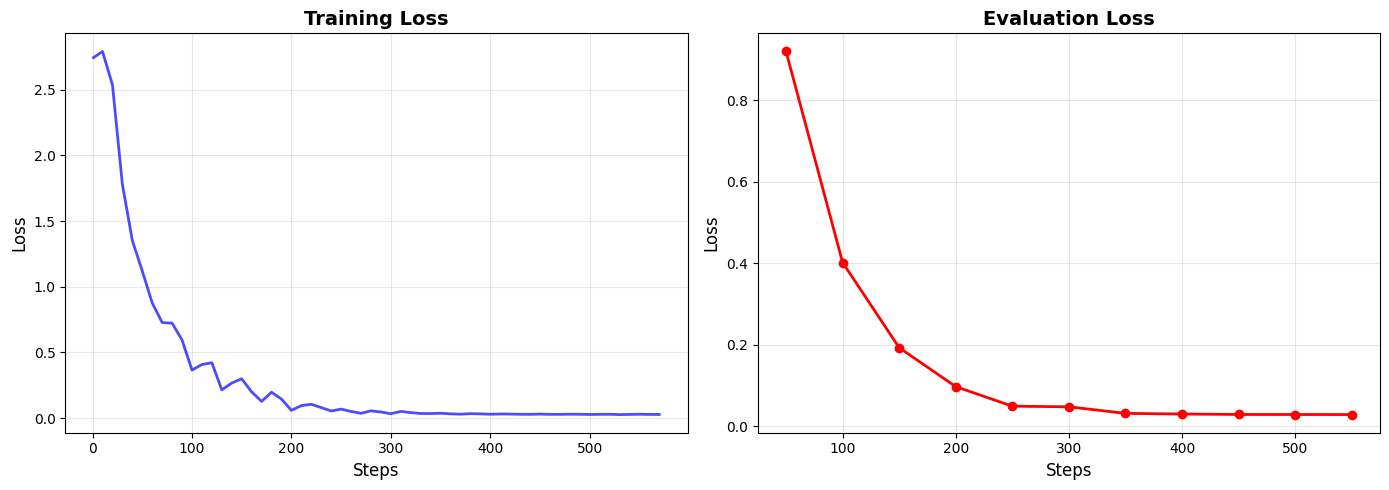

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

log_history = trainer.state.log_history
df = pd.DataFrame(log_history)

train_logs = df[df['loss']. notna()]. copy()
eval_logs = df[df['eval_loss'].notna()].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train Loss
axes[0].plot(train_logs['step'], train_logs['loss'], 'b-', alpha=0.7, linewidth=2)
axes[0].set_xlabel('Steps', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training Loss', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Eval Loss
if len(eval_logs) > 0:
    axes[1].plot(eval_logs['step'], eval_logs['eval_loss'], 'r-o', linewidth=2, markersize=6)
    axes[1].set_xlabel('Steps', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].set_title('Evaluation Loss', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_losses.png', dpi=150, bbox_inches='tight')
plt.show()